# Libraries

In [1]:
# general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Scikit stuff
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn import metrics
# Gradint Bossting
from xgboost import XGBRegressor
# Neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, LeakyReLU

# Datasets

In [2]:
with open('../0_data/3_abt_data/abt_train.csv', mode='r') as f:
    df_train = pd.read_csv(f, delimiter=',')

In [3]:
with open('../0_data/3_abt_data/abt_ott.csv', mode='r') as f:
    df_oot = pd.read_csv(f, delimiter=',')

In [4]:
#unifying dataframes
df = pd.concat([df_train, df_oot])
# deleting former dataframes
del df_train, df_oot

In [5]:
df.shape

(1442, 22)

removing uncessery columns

In [6]:
df.drop(columns=['nome_empresa','cidade','industria'], inplace=True)

In [7]:
df.shape

(1442, 19)

In [8]:
df.head(3)

,vaga_simplificada,senioridade,tamanho,tipo_propriedade,setor,receita,estado,idade_empresa,nota,fg_glassdor_est,fg_por_hora,descricao_qtd_palavras,estatistica,programacao,etl,saas,ferramentas_bi,ml_ai,salario_medio
0,Data Scientist,Unknown,10000+ Employees,Company - Public,Telecommunications,$10+ billion (USD),VA,21.0,3.9,1,0,133,0,0,0,0,0,0,114500.0
1,Data Scientist,Unknown,1001 to 5000 Employees,Company - Private,Aerospace & Defense,$1 to $2 billion (USD),VA,20.0,3.8,1,0,150,0,0,0,0,0,1,103000.0
2,Data Scientist,Unknown,501 to 1000 Employees,Company - Private,Insurance,$50 to $100 million (USD),FL,98.0,4.7,1,0,124,0,0,0,0,0,0,103000.0


# Pre processing

### generating features 

In [9]:
# removing target variable
x = df.drop('salario_medio', axis=1)

In [10]:
# generating target variable
y = df.salario_medio.values

### generating dummies

In [11]:
# generating dummies
x_dum = pd.get_dummies(x)

## transformation

In [12]:
scaler = StandardScaler()


In [13]:
scaler.fit(x_dum)

StandardScaler()

In [14]:
x_dum_scaler = scaler.transform(x_dum)

# Evaluation Models
  

 


## Lasso regression

In [15]:
ls_r = Lasso()

In [16]:
scores_ls_r = cross_val_score(ls_r, x_dum_scaler, y, n_jobs=4, cv=10, verbose=False, scoring='neg_mean_absolute_error')

In [17]:
print("MAE (Lasso Regression): {:,.2f}".format(abs(scores_ls_r.mean())))

MAE (Lasso Regression): 21,503.99


## Ridge regression

In [18]:
rr = Ridge()

In [19]:
scores_rr = cross_val_score(rr, x_dum_scaler, y, n_jobs=4, cv=10, verbose=False, scoring='neg_mean_absolute_error')

In [20]:
print("MAE (Ridge Regression): {:,.2f}".format(abs(scores_rr.mean())))

MAE (Ridge Regression): 21,504.92


## Elastic Net

In [21]:
elastic_net = ElasticNet()

In [22]:
scores_elastic_net = cross_val_score(elastic_net, x_dum_scaler, y, n_jobs=4, cv=10, verbose=False, scoring='neg_mean_absolute_error')

In [23]:
print("MAE (Elastic Net): {:,.2f}".format(abs(scores_elastic_net.mean())))

MAE (Elastic Net): 20,631.54


# Support Vector Regressor (SVR)

In [24]:
svr = SVR()

In [25]:
scores_svr = cross_val_score(svr, x_dum_scaler, y, n_jobs=4, cv=10, verbose=False, scoring='neg_mean_absolute_error')

In [26]:
print("MAE (SVR): {:,.2f}".format(abs(scores_svr.mean())))

MAE (SVR): 19,963.94


# Decision Tree Regressor

In [28]:
dtr = DecisionTreeRegressor(random_state=135)

In [29]:
scores_dtr = cross_val_score(dtr, x_dum_scaler, y, cv=10, verbose=False, scoring='neg_mean_absolute_error')

In [30]:
print("MAE (Decision Tree): {:,.2f}".format(abs(scores_dtr.mean())))

MAE (Decision Tree): 26,015.77


# Random Forest Regressor

In [31]:
rf = RandomForestRegressor(random_state=135)

In [32]:
scores_rf = cross_val_score(rf, x_dum_scaler, y, cv=10, verbose=False, scoring='neg_mean_absolute_error')

In [33]:
print("MAE (Random Forest): {:,.2f}".format(abs(scores_rf.mean())))

MAE (Random Forest): 20,892.22


# XGBoosting Regressor

In [34]:
xgb = XGBRegressor(random_state=135)

In [35]:
scores_xgb = cross_val_score(xgb, x_dum_scaler, y, cv=10, verbose=False, scoring='neg_mean_absolute_error')

In [36]:
print("MAE (XBG): {:,.2f}".format(abs(scores_xgb.mean())))

MAE (XBG): 21,725.78


# Neural Network

In [37]:
model = Sequential()
# Hidden layer
model.add(Dense(256, input_dim=132, activation='relu'))
model.add(Dropout(.20, seed=20))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.20, seed=20))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.20, seed=20))
model.add(Dense(32, activation='relu'))
model.add(Dropout(.20, seed=20))
model.add(Flatten())
# output layer
model.add(Dense(1, activation='linear'))

2022-03-12 21:39:22.712534: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [38]:
# compile model
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               34048     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [39]:
nt_res = model.fit(x_dum_scaler, y, batch_size=8, epochs=100, validation_split=0.2, workers=-1, verbose=1)

Epoch 1/100
145/145 [==============================] - 1s 2ms/step - loss: 10751403008.0000 - mae: 101031.8516 - val_loss: 11611689984.0000 - val_mae: 102324.5234
Epoch 2/100
145/145 [==============================] - 0s 2ms/step - loss: 2736193280.0000 - mae: 42283.2031 - val_loss: 3757123072.0000 - val_mae: 49436.4805
Epoch 3/100
145/145 [==============================] - 0s 2ms/step - loss: 1513138816.0000 - mae: 29808.2539 - val_loss: 3014364160.0000 - val_mae: 43831.3906
Epoch 4/100
145/145 [==============================] - 0s 2ms/step - loss: 1233344896.0000 - mae: 26587.0645 - val_loss: 2651478528.0000 - val_mae: 41020.5312
Epoch 5/100
145/145 [==============================] - 0s 2ms/step - loss: 1094464256.0000 - mae: 25161.4590 - val_loss: 2259420160.0000 - val_mae: 37292.3789
Epoch 6/100
145/145 [==============================] - 0s 2ms/step - loss: 1001436224.0000 - mae: 23887.7012 - val_loss: 2609661696.0000 - val_mae: 41166.8633
Epoch 7/100
145/145 [=====================

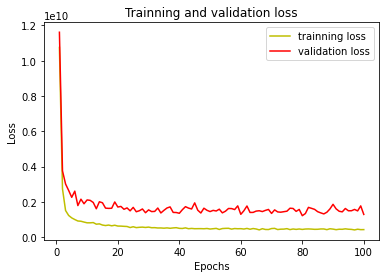

In [40]:
loss = nt_res.history['loss']
val_loss = nt_res.history['val_loss']
epochs = range(1, len(loss)+1)

# map
plt.plot(epochs, loss, 'y', label='trainning loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('Trainning and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

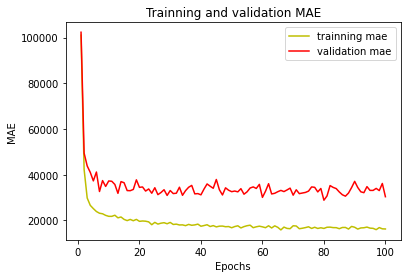

In [41]:
mae = nt_res.history['mae']
val_mae = nt_res.history['val_mae']
epochs = range(1, len(loss)+1)

# map
plt.plot(epochs, mae, 'y', label='trainning mae')
plt.plot(epochs, val_mae, 'r', label='validation mae')
plt.title('Trainning and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [42]:
mse_neural, mae_neural = model.evaluate(x_dum_scaler, y)

46/46 [==============================] - 0s 1ms/step - loss: 377239840.0000 - mae: 13500.0605


# Fine tunning the best model

In [43]:
svr_tune = RandomizedSearchCV(estimator=SVR(),n_iter=10, random_state=135, cv=10, n_jobs=-1, scoring='neg_mean_absolute_error', param_distributions={
    'kernel':['linear','rbf'],
    'gamma': ['scale','auto'],
    'C': [1, 5, 10, 15, 20],
    'shrinking': [True, False],
    'epsilon':[0.1, 0.2, 0.3],                 
})

In [44]:
svr_tune.fit(x_dum_scaler, y.reshape(-1,))

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/opt/anaconda3/envs/salary_pred/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.387e+09, tolerance: 8.624e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/salary_pred/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.121e+09, tolerance: 9.205e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/salary_pred/lib/python3.8/site-packages/sklearn/linea

RandomizedSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [1, 5, 10, 15, 20],
                                        'epsilon': [0.1, 0.2, 0.3],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf'],
                                        'shrinking': [True, False]},
                   random_state=135, scoring='neg_mean_absolute_error')

In [45]:
svr_tune.best_params_

{'shrinking': True, 'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.2, 'C': 10}

In [46]:
results= pd.DataFrame(svr_tune.cv_results_)

In [47]:
results[['mean_test_score','std_test_score','rank_test_score']].sort_values(by='rank_test_score', axis=0)

,mean_test_score,std_test_score,rank_test_score
7,-19958.206139,9465.445925,1
5,-19963.936152,9485.710953,2
8,-20004.567416,9344.857164,3
9,-20104.071183,9021.785534,4
2,-20104.071183,9021.785534,5
3,-20118.829095,8810.737152,6
1,-20118.839700,8810.740987,7
6,-20118.850355,8810.744850,8
4,-20148.155617,8290.683375,9
0,-20156.405087,8517.239876,10


## Split database between train/test

In [48]:
(X_train, X_test, y_train, y_test) = train_test_split(x_dum, y, test_size=0.2, random_state=135)

In [49]:
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((1153, 132), (1153,), (289, 132), (289,))

In [50]:
# transforming features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

## Trainning the best 2 models applying the best hyper paramaters

In [51]:
# SVR model

In [52]:
svr_best = SVR(shrinking=True, kernel='rbf', gamma='scale', epsilon=0.2, C=10)

In [53]:
svr_best.fit(X_train_scaler, y_train.reshape(-1, ))

SVR(C=10, epsilon=0.2)

In [54]:
# neural network model

In [55]:
result = model.fit(X_train_scaler, y, batch_size=8, epochs=100, validation_split=0.2, workers=-1, verbose=0)

## Evaluation

### SVR

In [56]:
# Train
y_pred = svr_best.predict(X_train_scaler)
train_eval = metrics.mean_absolute_error(y_train, y_pred)

# Test 
y_pred = svr_best.predict(X_test_scaler)
test_eval = metrics.mean_absolute_error(y_test, y_pred)

print('SRV model: \nMAE train={:,.0f}'.format(train_eval), '\nMAE test={:,.0f}'.format(test_eval))

SRV model: 
MAE train=19,448 
MAE test=20,133


In [57]:
# Train
y_pred = svr_best.predict(X_train_scaler)
train_eval = metrics.mean_absolute_error(y_train, y_pred)

# Test 
y_pred = svr_best.predict(X_test_scaler)
test_eval = metrics.mean_absolute_error(y_test, y_pred)

print('SRV model: \nMAE train={:,.0f}'.format(train_eval), '\nMAE test={:,.0f}'.format(test_eval))

SRV model: 
MAE train=19,448 
MAE test=20,133


In [58]:
# Train
y_pred = svr_best.predict(X_train_scaler)
train_eval = metrics.mean_squared_error(y_train, y_pred, squared=False)

# Test 
y_pred = svr_best.predict(X_test_scaler)
test_eval = metrics.mean_squared_error(y_test, y_pred, squared=False)

print('SRV model: \nRSME train={:,.0f}'.format(train_eval), '\nRMSE test={:,.0f}'.format(test_eval))

SRV model: 
RSME train=25,571 
RMSE test=26,808


In [59]:
# Train
y_pred = svr_best.predict(X_train_scaler)
train_eval = metrics.mean_absolute_percentage_error(y_train, y_pred)

# Test 
y_pred = svr_best.predict(X_test_scaler)
test_eval = metrics.mean_absolute_percentage_error(y_test, y_pred)

print('SRV model: \nMAPE train={:,.2f}'.format(train_eval), '\nMAPE test={:,.2f}'.format(test_eval))

SRV model: 
MAPE train=0.19 
MAPE test=0.19


### Neural Network

In [60]:
# Train
y_pred = model.predict(X_train_scaler)
train_eval = metrics.mean_absolute_error(y_train, y_pred)

# Test 
y_pred = model.predict(X_test_scaler)
test_eval = metrics.mean_absolute_error(y_test, y_pred)

print('Neural Network model: \nMAE train={:,.0f}'.format(train_eval), '\nMAE test={:,.0f}'.format(test_eval))

Neural Network model: 
MAE train=23,205 
MAE test=22,017


In [61]:
# Train
y_pred = model.predict(X_train_scaler)
train_eval = metrics.mean_squared_error(y_train, y_pred, squared=False)

# Test 
y_pred = model.predict(X_test_scaler)
test_eval = metrics.mean_squared_error(y_test, y_pred, squared=False)

print('Neural Network model: \nRMSE train={:,.0f}'.format(train_eval), '\nRMSE test={:,.0f}'.format(test_eval))

Neural Network model: 
RMSE train=30,152 
RMSE test=29,647


In [62]:
# Train
y_pred = model.predict(X_train_scaler)
train_eval = metrics.mean_absolute_percentage_error(y_train, y_pred)

# Test 
y_pred = model.predict(X_test_scaler)
test_eval = metrics.mean_absolute_percentage_error(y_test, y_pred)

print('SRV model: \nMAPE train={:,.2f}'.format(train_eval), '\nMAPE test={:,.2f}'.format(test_eval))

SRV model: 
MAPE train=0.20 
MAPE test=0.19


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scip